## Question 1
$\frac{\pi_i \mathcal{N}(x ; \mu_i , \Sigma_i))}{\Sigma_{j=1}^{K}\pi_j \mathcal{N}(x ; \mu_j , \Sigma_j)} 
= \exp( \log(\pi_i \mathcal{N}(x ; \mu_i , \Sigma_i)) - \log(\Sigma_{j=1}^{K}\pi_j \mathcal{N}(x ; \mu_j , \Sigma_j)) 
= \exp ( \log ( \pi_i ) + \log( \mathcal{N} (x ; \mu_i , \Sigma_i ) )  - \log ( \Sigma_{j=1}^{K} \pi_j \mathcal{N} ( x ; \mu_j , \Sigma_j ) ) )$


With:

$\mathcal{N}(x ; \mu , \Sigma)) = (2\pi)^{-\frac{k}{2}}\det(\Sigma)^{\frac{1}{2}}\exp(\frac{1}{2}(x - \mu)^T \Sigma^{-1} (x-\mu))$

$= \exp ( \log ( \pi_i ) + \log( (2\pi)^{-\frac{k}{2}}\det(\Sigma_i)^{\frac{1}{2}}\exp(\frac{1}{2}(x - \mu_i)^T {\Sigma_i}^{-1} (x-\mu_i)) )  - \log ( \Sigma_{j=1}^{K} \pi_j (2\pi)^{-\frac{k}{2}}\det(\Sigma_j)^{\frac{1}{2}}\exp(\frac{1}{2}(x - \mu_j)^T {\Sigma_j}^{-1} (x-\mu_j)) ) )$

$= \exp ( \log ( \pi_i ) -\frac{k}{2}\log(2\pi) + {\frac{1}{2}}\log( \det(\Sigma_i)) + (\frac{1}{2}(x - \mu_i)^T {\Sigma_i}^{-1} (x-\mu_i)) )  - \log ( \Sigma_{j=1}^{K} \pi_j (2\pi)^{-\frac{k}{2}}\det(\Sigma_j)^{\frac{1}{2}}\exp(\frac{1}{2}(x - \mu_j)^T {\Sigma_j}^{-1} (x-\mu_j)) ) )$

We have: $l_i =  \log ( \pi_i ) -\frac{k}{2}\log(2\pi) + {\frac{1}{2}}\log( \det(\Sigma_i)) + (\frac{1}{2}(x - \mu_i)^T {\Sigma_i}^{-1} (x-\mu_i)) ) $ with $ \det(\Sigma_i) = \Pi {\lambda_i}^k$ where $\{ {\lambda_i}^k \}_k$ are the eigen values of $ \Sigma_i $  

Choleski??

## Question 2

We need to to compute the next step of the parameters of our model: $\pi_{1:K}^{(t+1)}$ $\mu_{1:K}^{(t+1)}$ $\Sigma_{1:K}^{(t+1)}$.

***

### $\mu$

- Let's first compute: $ \nabla_{\mu_i}L_t(\theta) $

$L_t(\mu + h, \theta) = \Sigma_{n=1}^{N} \Sigma_{i=1}^{K} \gamma_{i}^{(t)} (x_n) (\frac{1}{2}\log |\Sigma_i| - \frac{1}{2}(x_n - \mu_i - h)^T \Sigma_{i}^{-1} (x_n - \mu_i - h) ) + cste$

We have:

$(x_n - \mu_i - h)^T \Sigma_{i}^{-1} (x_n - \mu_i - h) = ((x_n - \mu_i)^T - h^T) [\Sigma_{i}^{-1} (x_n - \mu_i) -\Sigma_{i}^{-1} h)]$

$ = (x_n - \mu_i)^T \Sigma_{i}^{-1}  (x_n - \mu_i) - h^T \Sigma_{i}^{-1} (x_n - \mu_i) - (x_n - \mu_i)^T \Sigma_{i}^{-1} h + h^T  \Sigma_{i}^{-1} h - 2 (x_n - \mu_i)^T \Sigma_{i}^{-1} h $

$ \nabla_{\mu_i}L_t(\theta) = \Sigma_{n=1}^{N} \gamma_{i}^{(t)} (x_n - \mu_i)^T \Sigma_{i}^{-1}$


$$ \Sigma_{n=1}^{N} \gamma_{i}^{(t)}(x_n)x_{n}^{T}\Sigma_{i}^{-1} = \Sigma_{n=1}^{N}\gamma_{i}^{(t)}(x_n)\mu_{i}^{T}\Sigma_{i}^{-1} $$

$$ \iff\Sigma_{n=1}^{N} \gamma_{i}^{(t)}(x_n)x_{n}^{T}\Sigma_{i}^{-1} = \mu_{i}^{T}\Sigma_{n=1}^{N}\gamma_{i}^{(t)}(x_n)\Sigma_{i}^{-1}$$

$$\iff \mu_i = \frac{\Sigma_{n=1}^{N}\gamma_{i}^{(t)}(x_n)x_n}{\Sigma_{n=1}^{N}\gamma_{i}^{(t)}(x_n)} $$


***

### $\Sigma$

- Let's focus on $ \nabla_{\Sigma_i}L_t(\theta) $ now.

$L_t(\Sigma + H, \theta) = \Sigma_{n=1}^{N} \Sigma_{i=1}^{K} \gamma_{i}^{(t)}(x_n) [ - \frac{1}{2} \log |\Sigma_i + H| - \frac{1}{2}  (x_n - \mu_i)^T (\Sigma_i + H)^{-1}(x_n - \mu_i))] + \Sigma_{n=1}^{N}\Sigma_{i=1}^{K}\gamma_{i}^{(t)}(x_n)\log(\pi_i) $

$= \Sigma_{n=1}^{N}\Sigma_{k=1}^{K} \gamma_{i}^{(t)}(x_n)[ -\frac{1}{2}\log(| \Sigma_i|) - \frac{1}{2}tr(\Sigma_{i}^{-1}H) +o(||H||) - \frac{1}{2}( (x_n - \mu_i)^T \Sigma_{i}^{-1} (x_n - \mu_i) -  <\Sigma_{i}^{-1}(x_n - \mu_i)(x_n - \mu_i)^T \Sigma_{i}^{-1}, H> +o(||H||))] + \Sigma_{n=1}^{N}\Sigma_{i=1}^{K}\gamma_{i}^{(t)}(x_n)\log(\pi_i)$


We have:

$\det(\Sigma_i + H) 
= \det [\Sigma_i (I + \Sigma_{i}^{-1} H)] = \det (\Sigma_i) \det(I +  \Sigma_{i}^{-1} H)) 
= \det(\Sigma_i)(1 + tr(\Sigma_{i}^{-1}H) + o(||H||))$

and $tr(\Sigma_{i}^{-1}H) = <(\Sigma_{i}^{-1})^T, H>$ 

thus we have:

$\det(\Sigma_i + H) = \det (\Sigma_i) + <\det (\Sigma_i)(\Sigma_{i}^{-1})^T, H> + o(||H||)) $

$\log[\det(\Sigma_i + H)] = \log( \det (\Sigma_i) ) + \log(<\det (\Sigma_i)(\Sigma_{i}^{-1})^T, H>) + o(||H||)) $

<!---
    T'es sur de toi sur le log et le o(||H||)?
-->

    $$\Sigma_{n=1}^{N} \gamma_{i}^{(t)}(x_n) (-\frac{1}{2}\Sigma_{i}^{-1} + \frac{1}{2}\Sigma_{i}^{-1} (x_n - \mu_i)(x_n - \mu_i)^T \Sigma){i}^{-1}) = 0$$

$$\iff - \Sigma_{n=1}^{N}\gamma_{i}^{(t)}(x_n)\Sigma_{i}^{-1} + \Sigma_{n=1}^{N}\gamma_{i}^{(t)}(x_n) \Sigma_{i}^{-1} (x_n - \mu_i)(x_n - \mu_i)^T \Sigma_{i}^{-1} = 0$$

$$\iff \Sigma_{n=1}^{N}\gamma_{i}^{(t)}(x_n)\Sigma_{i}^{-1} = \Sigma_{n=1}^{N}\gamma_{i}^{(t)}(x_n) \Sigma_{i}^{-1} (x_n - \mu_i)(x_n - \mu_i)^T \Sigma_{i}^{-1}$$

$$\iff \Sigma_{n=1}^{N}\gamma_{i}^{(t)}(x_n) = \Sigma_{n=1}^{N}\gamma_{i}^{(t)} (x_n)\Sigma_{i}^{-1} (x_n - \mu_i)(x_n - \mu_i)^T$$

$$\iff \Sigma_{i} = \frac{\Sigma_{n=1}^{N}\gamma_{i}^{(t)}(x_n) (x_n - \mu_i)(x_n - \mu_i)^T}{\Sigma_{n=1}^{N}\gamma_{i}^{(t)}(x_n)}$$


***

### $\pi$

We have the constraint on $\pi$ that $\Sigma_{i}\pi_i = 1$

$\forall$ $i$ we will maximize $f(\pi_i, \lambda) = \Sigma_{n=1}^{N}\gamma_{i}^{t}(x_n) \log(\pi_i) + \lambda (\Sigma_{k=1}^{K}\pi_k - 1)$

$\pi_i \in \mathbb{R}$

$f'(\pi_i , \lambda) = \Sigma_{n=1}^{N} \gamma_{i}^{(t)}(x_n)\frac{1}{\pi_i} + \lambda (\frac{\partial (\Sigma_{k=1}^{K} \pi_k - 1)}{\partial \pi_i}) = \Sigma_{n=1}^{N} \gamma_{i}^{(t)}(x_n)\frac{1}{\pi_i} + \lambda$

$f'(\pi_i , \lambda) = 0 \iff \Sigma_{n=1}^{N} \gamma_{i}^{(t)}(x_n) = - \lambda \pi_i$

$\implies \Sigma_{i=1}^{K}( \Sigma_{n=1}^{N} \gamma_{i}^{(t)}(x_n) ) = 
\lambda \Sigma_{i=1}^{K} ( \pi_i )$

$\implies \lambda = - \Sigma_{i=1}^{K}\Sigma_{n=1}^{N}\gamma_{i}^{(t)}$

But $\Sigma_{i=1}^{K} \gamma_{i}^{(t)} = 1$ thus $\lambda = -N$

Then: 

$\Sigma_{n=1}^{N}\gamma_{i}^{(t)}\frac{1}{\pi_i} = N $

$\iff \frac{1}{\pi_i} = \frac{N}{\Sigma_{n=1}^{N}\gamma_{i}^{(t)}}$

$\iff \pi_i = \frac{\Sigma_{n=1}^{N}\gamma_{i}^{(t)}}{N}$


## Question 3
1. First we generate some synthetic data

In [1]:
# Imports
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats
from tqdm import tqdm
from scipy.stats import multivariate_normal

In [2]:
# Parameters
N = 1000
K = 3
pis = [0.3, 0.2, 0.5]
mus = [[0, 0], [1, 2], [2, 0]]
sigmas = [
    [[1.00, -0.25],
     [-0.25, 0.50]], 
    [[0.50, 0.25],
     [ 0.25, 0.50]], 
    [[0.50, -0.25],
     [-0.25, 1]]]
assert K == len(pis) == len(mus) == len(sigmas)
assert sum(pis) == 1
assert len(sigmas[0]) == len(sigmas[0][0]) == len(mus[0]) # Must be checked for all i,j

In [3]:
# Data generation
gmm_sample = np.zeros((N, len(mus[0])))  # Initialisation
xis = np.random.multinomial(1, pis, size=N)  # To which gaussian do we belong
xis = np.array(xis, dtype=bool)
for gaussian_idx in range(K):
    gmm_sample[xis[:,gaussian_idx]] = np.random.multivariate_normal(
        mean=mus[gaussian_idx], cov=sigmas[gaussian_idx], size=N)[xis[:,gaussian_idx]]

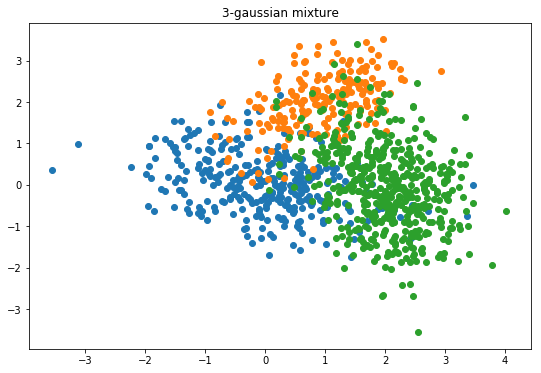

In [4]:
# Plot generated data
plt.figure(figsize=(9,6))
plt.plot()
plt.title("{}-gaussian mixture".format(K))
for gaussian_idx in range(K):
    plt.scatter(gmm_sample[:,0][xis[:,gaussian_idx]], gmm_sample[:,1][xis[:,gaussian_idx]])
plt.show()
plt.close()

-4.311578173270805 4.766079529312318 -4.255166101501681 4.223970349516586


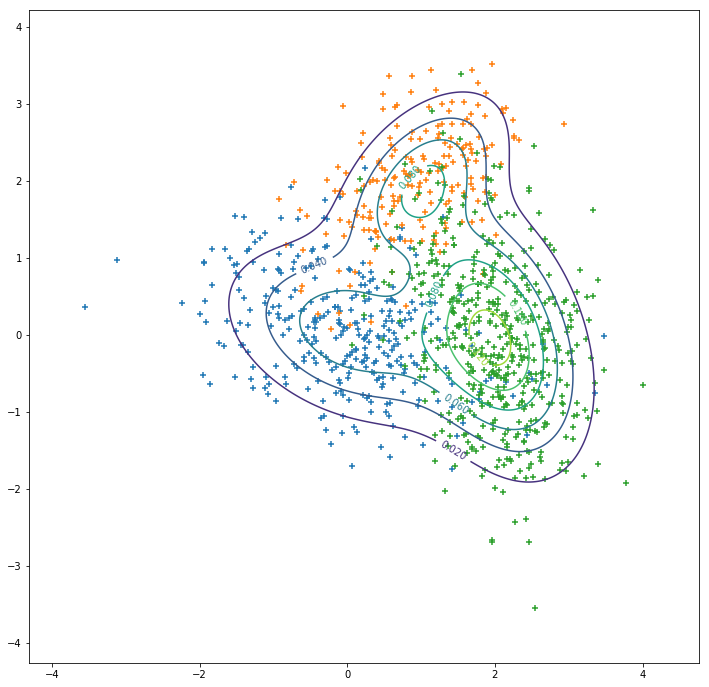

In [5]:
# Extract x and y
X = gmm_sample[:,0]
Y = gmm_sample[:,1]
# Define the borders
deltaX = (max(X) - min(X))/10
deltaY = (max(Y) - min(Y))/10
xmin = min(X) - deltaX
xmax = max(X) + deltaX
ymin = min(Y) - deltaY
ymax = max(Y) + deltaY
print(xmin, xmax, ymin, ymax)

normals = [None for _ in pis]
for idx, pi in enumerate(pis):
    normals[idx] = multivariate_normal(mus[idx],sigmas[idx])

def my_distrib(pos):
    return sum(pis[idx]*normal.pdf(pos) for idx, normal in enumerate(normals))

    
x, y = np.mgrid[xmin:xmax:.01, ymin:ymax:.01]
pos = np.dstack((x, y))
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

if False:
    ax.contourf(x, y, my_distrib(pos))
else:
    cp = ax.contour(x, y, my_distrib(pos))
ax.clabel(cp, inline=True,
          fontsize=10)
for gaussian_idx in range(K):
    ax.scatter(gmm_sample[:,0][xis[:,gaussian_idx]], gmm_sample[:,1][xis[:,gaussian_idx]],marker='+')

- EM Algorithm

In [6]:
"""

K mixtures
N samples
d dimension of the samples

"""

def comp_expectation(data, means, covariances, membership_weights, i, n):
    d = len(data[0])
    eig_values, eig_vectors = np.linalg.eig(covariances[i])
    log_det_sigma = sum([np.log(eig_values[j]) for j in range(len(eig_values))])
    return( np.float(np.log(membership_weights[i]) - (d/2)*np.log(np.pi * 2) - (1/2)*log_det_sigma 
            - (1/2)*(data[n]-means[i])[np.newaxis,:].dot(np.linalg.inv(covariances[i]).dot((data[n]-means[i])[:,np.newaxis]))) )

def v_i(data, means, covariances, membership_weights, i, n):
    """
    Compute log(Pi_i * N(xn ; mu_i, sigma_i)) in a stable way
    """
    d = len(data[0])
    eig_values, eig_vectors = np.linalg.eig(covariances[i])
    log_det_sigma = sum([np.log(eig_values[j]) for j in range(len(eig_values))])
    return( np.float(np.log(membership_weights[i]) - (d/2)*np.log(np.pi * 2) - (1/2)*log_det_sigma
            - (1/2)*(data[n]-means[i])[np.newaxis,:].dot(np.linalg.inv(covariances[i]).dot((data[n]-means[i])[:,np.newaxis]))) )

def sum_v_i(data, means, covariances, membership_weights, n):
    """
    Compute sum over i of log(Pi_i * N(xn ; mu_i, sigma_i)) in a stable way
    Log sum exp trick
    """
    K = len(means)
    all_v = [v_i(data, means, covariances, membership_weights, i, n) for i in range(K)]
    max_v = np.max(np.abs(all_v))
    return np.log(np.sum(np.exp(all_v + max_v))) - max_v

def M_step(data, gammas):
    """
    Maximization step
    We try to maximize the parameters given the weights w_ij
    gammas: R^{K*N}
    """
    # Simple variables for computations
    K = len(gammas)
    d = len(data[0])
    N = len(data)   
    
    Nk = gammas.sum(axis=1)

    means = [1/Nk[j] * (np.array([[gammas[i,n]*data[n] for i in range(K)] for n in range(N)]).sum(axis=0))[j] for j in range(K)]
    covariances = [1/Nk[j] * (np.array([[gammas[i,n]*(data[n]-means[i])[:,np.newaxis].dot((data[n]-means[i])[np.newaxis,:]) for i in range(K)] for n in range(N)]).sum(axis=0))[j] for j in range(K)]
    pis = Nk/N
    
    return means, covariances, pis

def E_step(data, means, covariances, membership_weights):
    """
    Estimation step
    We compute w_ij given the current parameters
    means: R^{K*d}
    covariances: R^{K*d*d}
    membership_weights: R^{K} ( pi_k )
    """
    # Simple variables for computations
    K = len(membership_weights)
    d = len(data[0])
    N = len(data)
    
    log_normalisation = np.array([sum_v_i(data, means, covariances, membership_weights, n) for n in range(N)])
    log_gamma_k = []
    for gaussian_idx in range(K):
        log_gamma_k.append(np.array([v_i(data, means, covariances, membership_weights, gaussian_idx, n) for n in range(N)]) - log_normalisation)
    
    log_gamma_k = np.array(log_gamma_k)
    gamma_k = np.exp(log_gamma_k)
    
    log_expectation = np.sum([[gamma_k[i,n]*comp_expectation(data, means, covariances, membership_weights, i, n) for i in range(K)] for n in range(N)])
    
    # TODO: Change det to https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.slogdet.html#numpy.linalg.slogdet

    return log_expectation, gamma_k

def EM(data, epsilon, means_0, covariances_0, membership_weights_0):
    """
    EM Algorithm
    epsilon: threshold
    """
    
    delta = 1000
    
    means_t = means_0
    covariances_t = covariances_0
    membership_weights_t = membership_weights_0
    
    value_t_1, gammas_t = E_step(data = data, means = means_t, covariances = covariances_t,
                                 membership_weights = membership_weights_t)
    
    while delta > epsilon :
        means_t, covariances_t, membership_weights_t = M_step(data = data, gammas = gammas_t)
        value_t, gammas_t = E_step(data = data, means = means_t, covariances = covariances_t,
                                   membership_weights = membership_weights_t)
        delta = value_t - value_t_1
        value_t_1 = value_t
        
    return means_t, covariances_t, membership_weights_t

In [7]:
# UNSTABLE ONE

"""

K mixtures
N samples
d dimension of the samples

"""

def comp_expectation_unstable(data, means, covariances, membership_weights,i,n):
    d = len(data[0])
    return( np.float(np.log(membership_weights[i]) - (d/2)*np.log(np.pi * 2) - (1/2)*np.log(np.linalg.det(covariances[i])) 
             - (1/2)*(data[n] - means[i])[np.newaxis,:].dot(np.linalg.inv(covariances[i]).dot((data[n] - means[i])[:,np.newaxis]))) )


def M_step_unstable(data, gammas):
    """
    Maximization step
    We try to maximize the parameters given the weights w_ij
    gammas: R^{K*N}
    """
    # Simple variables for computations
    K = len(gammas)
    d = len(data[0])
    N = len(data)   
    
    Nk = gammas.sum(axis=1)

    means = [1/Nk[j] * (np.array([[gammas[i,n]*data[n] for i in range(K)] for n in range(N)]).sum(axis=0))[j] for j in range(K)]
    covariances = [1/Nk[j] * (np.array([[gammas[i,n]*(data[n]-means[i])[:,np.newaxis].dot((data[n]-means[i])[np.newaxis,:]) for i in range(K)] for n in range(N)]).sum(axis=0))[j] for j in range(K)]
    pis = Nk/N
    
    return means, covariances, pis

def E_step_unstable(data, means, covariances, membership_weights):
    """
    Estimation step
    We compute w_ij given the current parameters
    means: R^{K*d}
    covariances: R^{K*d*d}
    membership_weights: R^{K} ( pi_k )
    """
    # Simple variables for computations
    K = len(membership_weights)
    d = len(data[0])
    N = len(data)
    
    normalisation = np.array([membership_weights[i]*scipy.stats.multivariate_normal.pdf(gmm_sample, mean=means[i], cov=covariances[i]) for i in range(K)]).sum(axis=0)
    gamma_k = []
    for gaussian_idx in range(K):
        gamma_k.append(membership_weights[gaussian_idx]*scipy.stats.multivariate_normal.pdf(gmm_sample, mean=means[gaussian_idx], cov=covariances[gaussian_idx])/normalisation)
    gamma_k = np.array(gamma_k)
    
    log_exp = np.sum([[gamma_k[i,n]*comp_expectation_unstable(data, means, covariances, membership_weights, i, n) for i in range(K)] for n in range(N)])
    
    # TODO: Change det to https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.slogdet.html#numpy.linalg.slogdet
    
    return log_exp, gamma_k

def EM(data, epsilon, means_0, covariances_0, membership_weights_0):
    """
    EM Algorithm
    """
    
    delta = 1000
    
    means_t = means_0
    covariances_t = covariances_0
    membership_weights_t = membership_weights_0
    
    value_t_1, gammas_t = E_step(data = data, means = means_t, covariances = covariances_t,
                                 membership_weights = membership_weights_t)
    
    while delta > epsilon :
        means_t, covariances_t, membership_weights_t = M_step(data = data, gammas = gammas_t)
        value_t, gammas_t = E_step(data = data, means = means_t, covariances = covariances_t,
                               membership_weights = membership_weights_t)
        delta = value_t - value_t_1
        value_t_1 = value_t
    return means_t, covariances_t, membership_weights_t

In [8]:
def EM_generator(data, epsilon, means_0, covariances_0, membership_weights_0):
    """
    EM Algorithm
    """
    
    delta = 1000
    
    means_t = means_0
    covariances_t = covariances_0
    membership_weights_t = membership_weights_0
    value_t_1, gammas_t = E_step(data = data, means = means_t, covariances = covariances_t,
                                 membership_weights = membership_weights_t)
    yield means_t, covariances_t, membership_weights_t, delta, value_t_1
    
    while delta > epsilon :
        means_t, covariances_t, membership_weights_t = M_step(data = data, gammas = gammas_t)
        value_t, gammas_t = E_step(data = data, means = means_t, covariances = covariances_t,
                               membership_weights = membership_weights_t)
        delta = value_t - value_t_1
        value_t_1 = value_t
        
        yield means_t, covariances_t, membership_weights_t, delta, value_t_1
    raise StopIteration

In [9]:
value, gammas = E_step(data=gmm_sample,
                       means=np.array(mus), 
                       covariances=np.array(sigmas),
                       membership_weights=np.ones(3)/3)

In [10]:
value_u, gammas_u = E_step_unstable(data=gmm_sample,
                       means=np.array(mus), 
                       covariances=np.array(sigmas),
                       membership_weights=np.ones(3)/3)

In [11]:
display(value_u)
display(value)
display(gammas_u)
display(gammas)

-3410.3338945925543

-3410.3338945925543

array([[3.45655936e-06, 6.66215703e-02, 8.76595302e-01, ...,
        7.72834427e-02, 1.06514633e-02, 8.17165738e-02],
       [9.53713599e-01, 2.19071439e-10, 8.75777004e-03, ...,
        1.60041330e-08, 2.62294358e-05, 7.98539558e-01],
       [4.62829448e-02, 9.33378429e-01, 1.14646928e-01, ...,
        9.22716541e-01, 9.89322307e-01, 1.19743869e-01]])

array([[3.45655936e-06, 6.66215703e-02, 8.76595302e-01, ...,
        7.72834427e-02, 1.06514633e-02, 8.17165738e-02],
       [9.53713599e-01, 2.19071439e-10, 8.75777004e-03, ...,
        1.60041330e-08, 2.62294358e-05, 7.98539558e-01],
       [4.62829448e-02, 9.33378429e-01, 1.14646928e-01, ...,
        9.22716541e-01, 9.89322307e-01, 1.19743869e-01]])

In [12]:
m,c,p = M_step(data=gmm_sample, gammas = gammas)

In [13]:
m_u,c_u,p_u = M_step_unstable(data=gmm_sample, gammas = gammas)

In [14]:
display(m)
display(m_u)
display(c)
display(c_u)
display(p)
display(p_u)

[array([ 0.07326081, -0.02324231]),
 array([0.96638908, 1.93753481]),
 array([ 2.08181697, -0.15084983])]

[array([ 0.07326081, -0.02324231]),
 array([0.96638908, 1.93753481]),
 array([ 2.08181697, -0.15084983])]

[array([[ 1.10777264, -0.30754646],
        [-0.30754646,  0.50203985]]), array([[0.52019023, 0.21077025],
        [0.21077025, 0.48214922]]), array([[ 0.41643062, -0.1729094 ],
        [-0.1729094 ,  0.9176964 ]])]

[array([[ 1.10777264, -0.30754646],
        [-0.30754646,  0.50203985]]), array([[0.52019023, 0.21077025],
        [0.21077025, 0.48214922]]), array([[ 0.41643062, -0.1729094 ],
        [-0.1729094 ,  0.9176964 ]])]

array([0.3318681 , 0.24084755, 0.42728435])

array([0.3318681 , 0.24084755, 0.42728435])

In [15]:
E_step(data=gmm_sample,
       means=np.array(mus), 
       covariances=np.array(sigmas),
       membership_weights=np.ones((3))/3)

(-3410.3338945925543,
 array([[3.45655936e-06, 6.66215703e-02, 8.76595302e-01, ...,
         7.72834427e-02, 1.06514633e-02, 8.17165738e-02],
        [9.53713599e-01, 2.19071439e-10, 8.75777004e-03, ...,
         1.60041330e-08, 2.62294358e-05, 7.98539558e-01],
        [4.62829448e-02, 9.33378429e-01, 1.14646928e-01, ...,
         9.22716541e-01, 9.89322307e-01, 1.19743869e-01]]))

In [16]:
E_step_unstable(data=gmm_sample,
       means=np.array(mus), 
       covariances=np.array(sigmas),
       membership_weights=np.ones((3))/3)

(-3410.3338945925543,
 array([[3.45655936e-06, 6.66215703e-02, 8.76595302e-01, ...,
         7.72834427e-02, 1.06514633e-02, 8.17165738e-02],
        [9.53713599e-01, 2.19071439e-10, 8.75777004e-03, ...,
         1.60041330e-08, 2.62294358e-05, 7.98539558e-01],
        [4.62829448e-02, 9.33378429e-01, 1.14646928e-01, ...,
         9.22716541e-01, 9.89322307e-01, 1.19743869e-01]]))

In [ ]:
# Extract x and y
X = gmm_sample[:,0]
Y = gmm_sample[:,1]
# Define the borders
deltaX = (max(X) - min(X))/10
deltaY = (max(Y) - min(Y))/10
xmin = min(X) - deltaX
xmax = max(X) + deltaX
ymin = min(Y) - deltaY
ymax = max(Y) + deltaY
print(xmin, xmax, ymin, ymax)

# TODO: Compute log-likelihood
max_iter = 100
estimated_components = 3
np.random.seed(0)
means_0 = np.random.rand(3,2)
covariances_0=np.random.rand(3,2,2)
for idx, matrix in enumerate(covariances_0):
    covariances_0[idx] = np.transpose(matrix)@matrix

membership_weights_0 = np.random.rand(3)
membership_weights_0 /= np.sum(membership_weights_0)

delta = None
means = means_0
membership_weights = membership_weights_0
value = None
log_likes = list()

with tqdm(enumerate(EM_generator(data=gmm_sample,
                       means_0=means_0, 
                       covariances_0=covariances_0,
                       membership_weights_0=membership_weights_0,
                       epsilon=1e-3)),
                       total = max_iter, 
                       postfix={'delta': delta,
                                'Log-Likelihood': value, 
                                'means':means,
                                'membership_weights':membership_weights}) as pbar:
    
    for t, (means, covariances, membership_weights, delta, value) in pbar:
        pbar.set_postfix({'delta': delta,
                            'Log-Likelihood': value, 
                            'means':means,
                            'membership_weights':membership_weights})
        normals = [None for _ in membership_weights]
        for idx, _ in enumerate(membership_weights):
            normals[idx] = multivariate_normal(means[idx],covariances[idx])

        def my_distrib(pos):
            return sum(membership_weights[idx]*normal.pdf(pos) for idx, normal in enumerate(normals))


        x, y = np.mgrid[xmin:xmax:.01, ymin:ymax:.01]
        pos = np.dstack((x, y))
        fig = plt.figure(figsize=(12,12))
        ax = fig.add_subplot(111)

        if False:
            ax.contourf(x, y, my_distrib(pos))
        else:
            cp = ax.contour(x, y, my_distrib(pos))
        ax.clabel(cp, inline=True,
                  fontsize=10)
        for gaussian_idx in range(K):
            ax.scatter(gmm_sample[:,0][xis[:,gaussian_idx]], gmm_sample[:,1][xis[:,gaussian_idx]],marker='+')
        plt.savefig("em_algorithm_t_{}.png".format(str(t).zfill(4)))
        plt.savefig("em_algorithm_t_{}.svg".format(str(t).zfill(4)))
        plt.close()
        log_likes.append(value)
        if  t > max_iter:
            print('Reach max_iteration={}'.format(max_iter))
            break

-4.311578173270805 4.766079529312318 -4.255166101501681 4.223970349516586


  0%| | 0/100 [00:00<?, ?it/s, Log-Likelihood=None, delta=None, means=[[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]], membership_weights=[0.29623897 0.3312077  0.37255333]]c:\users\luism\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in exp
  0%| | 0/100 [00:05<?, ?it/s, delta=1000, Log-Likelihood=-6.17e+3, means=[[0.5488135  0.71518937]
 [0.60276338 0.54488318]
  1%| | 1/100 [00:08<13:29,  8.18s/it, delta=1000, Log-Likelihood=-6.17e+3, means=[[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 17%|▏| 17/100 [02:20<10:13,  7.39s/it, delta=0.585, Log-Likelihood=-3.23e+3, means=[array([ 1.12933244, -0.03255868]), array([1.27484546, 2.12736911]), array([0.42984077, 2.0354501 ])], membership_weights=[0.80170579 0.184574   0.01372021]]